In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [147]:
df = pd.read_csv('dataset.csv')
df.head()

,DIC Occurrence,HyperTension,IHD,Diabete Mellitus,A-Fibrillation,Metabolic,Chronic Renal Failure,Chronic Liver Failure,Hemiparesis,Cerebral edema,...,Surgical Site Infection,Slope,Average SBP in am,Average DBP,Average SBP in pm,Stdev,Gender,Average,StdevGCS,Death
0,0,1,1,0,1,0,0,0,0,1,...,0,-1.181818,171.000000,106.500000,189.000000,41.841650,f,11.500000,0.925820,0
1,0,1,0,1,0,1,1,0,1,0,...,0,0.000000,180.000000,140.000000,190.000000,35.355339,f,15.000000,0.000000,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0.970588,168.750000,99.375000,168.125000,36.582527,m,9.500000,1.900292,0
3,0,1,1,1,1,1,0,0,1,0,...,0,-3.428571,171.666667,100.000000,153.333333,40.794663,f,12.714286,0.951190,0
4,0,0,0,0,0,0,0,0,0,0,...,0,-0.051600,153.888889,91.666667,157.222222,34.591723,f,14.900000,0.316228,0


In [83]:
df.shape

(150, 46)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DIC Occurrence                        150 non-null    int64  
 1   HyperTension                          150 non-null    int64  
 2   IHD                                   150 non-null    int64  
 3   Diabete Mellitus                      150 non-null    int64  
 4   A-Fibrillation                        150 non-null    int64  
 5   Metabolic                             150 non-null    int64  
 6   Chronic Renal Failure                 150 non-null    int64  
 7   Chronic Liver Failure                 150 non-null    int64  
 8   Hemiparesis                           150 non-null    int64  
 9   Cerebral edema                        150 non-null    int64  
 10  Stroke Diagnosis                      150 non-null    int64  
 11  Arterial hypertensi

In [148]:
df.Gender[df.Gender == 'm'] = 1
df.Gender[df.Gender == 'f'] = 0
check = df

## Graphing

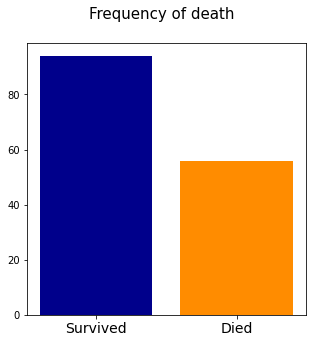

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))
plt.suptitle('Frequency of death', fontsize=15)
ax.bar(df['Death'].value_counts().index, 
       df['Death'].value_counts().values,
       color = ['darkblue', 'darkorange'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels(['Survived','Died'], fontsize = 14);

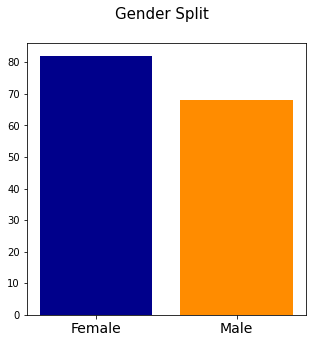

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))
plt.suptitle('Gender Split', fontsize=15)
ax.bar(df['Gender'].value_counts().index, 
       df['Gender'].value_counts().values,
       color = ['darkblue', 'darkorange'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels(['Female','Male'], fontsize = 14);

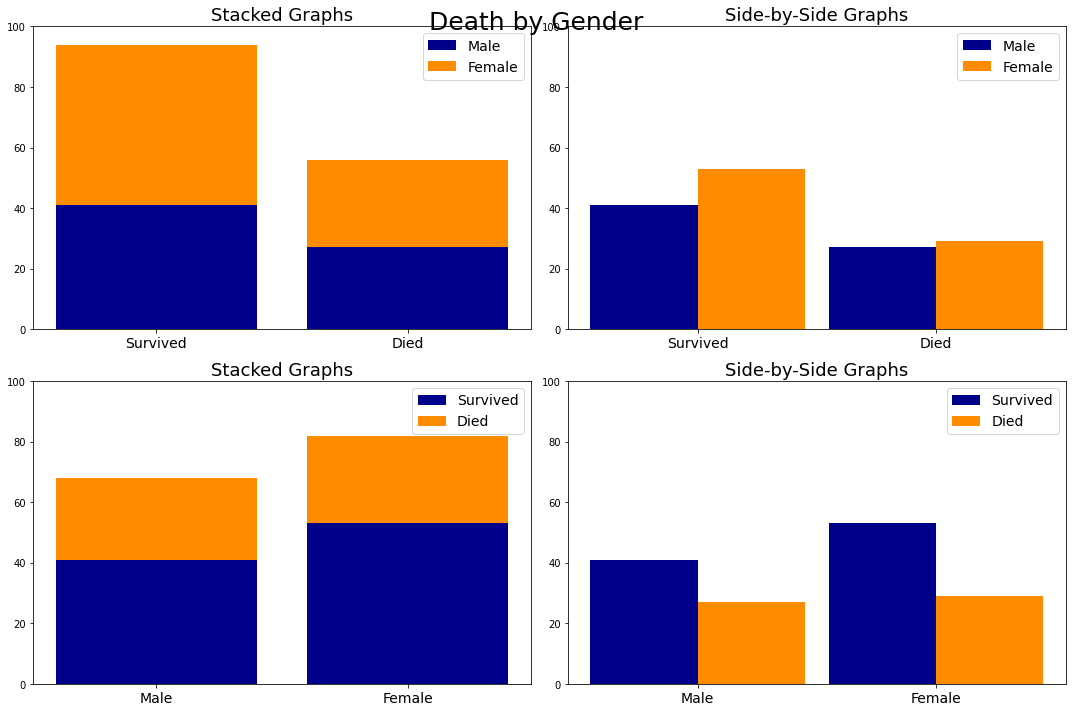

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plt.suptitle('Death by Gender', fontsize=25)
ind = np.arange(2)
width = 0.45
male_stats = df[df['Gender'] == 'm']['Death'].value_counts().values
female_stats = df[df['Gender'] == 'f']['Death'].value_counts().values
ax[0][0].set_title('Stacked Graphs', fontsize = 18)  
ax[0][0].bar(ind, male_stats, label = 'Male', color = 'darkblue')
ax[0][0].bar(ind, female_stats, label = 'Female', 
             color = 'darkorange', bottom = male_stats)
ax[0][0].set_xticks(range(0, 2))
ax[0][0].set_xticklabels(['Survived','Died'], fontsize = 14)
ax[0][1].set_title('Side-by-Side Graphs', fontsize = 18)  
ax[0][1].bar(ind, male_stats , width, label='Male', 
             color = 'darkblue')
ax[0][1].bar(ind + width, female_stats, width, label='Female', 
             color = 'darkorange')
plt.sca(ax[0][1])
plt.xticks(ind + width / 2, ('Survived','Died'), fontsize = 14)
ax[1][0].set_title('Stacked Graphs', fontsize = 18)  
ax[1][0].bar('Male', male_stats[0], label = 'Survived', 
             color = 'darkblue')
ax[1][0].bar('Male', male_stats[1], label = 'Died', 
             color = 'darkorange', bottom = male_stats[0])
ax[1][0].bar('Female', female_stats[0], color = 'darkblue')
ax[1][0].bar('Female', female_stats[1], color = 'darkorange', 
             bottom = female_stats[0])
ax[1][0].set_xticklabels(['Male','Female'], fontsize = 14)
ax[1][1].set_title('Side-by-Side Graphs', fontsize = 18)  
ax[1][1].bar(0, male_stats[0] , width, label='Survived', 
             color = 'darkblue')
ax[1][1].bar(0 + width, male_stats[1] , width, 
             label='Died', color = 'darkorange')
ax[1][1].bar(1, female_stats[0] , width, color = 'darkblue')
ax[1][1].bar(1 + width, female_stats[1] , width, 
             color = 'darkorange')
plt.sca(ax[1][1])
plt.xticks(ind + width / 2, ('Male', 'Female'), fontsize = 14)
[axi.legend(fontsize = 14) for axi in ax.ravel()]
[axi.set_ylim(0, 100) for axi in ax.ravel()]
fig.tight_layout()
plt.show();

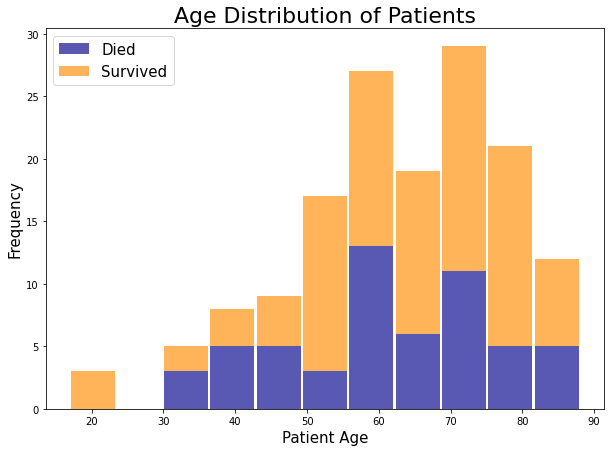

In [35]:
fig, ax = plt.subplots(figsize=(10,7))
age_died = np.array(df[df['Death']==1]['Age'])
age_survive = np.array(df[df['Death']==0]['Age'])
n, bins, patches = plt.hist(x = [age_died, age_survive], 
                            stacked = True, bins='auto', 
                            color=['darkblue', 'darkorange'],
                            alpha=0.65, rwidth=0.95)
plt.xlabel('Patient Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution of Patients', fontsize = 22)
plt.legend(['Died','Survived'], fontsize = 15);

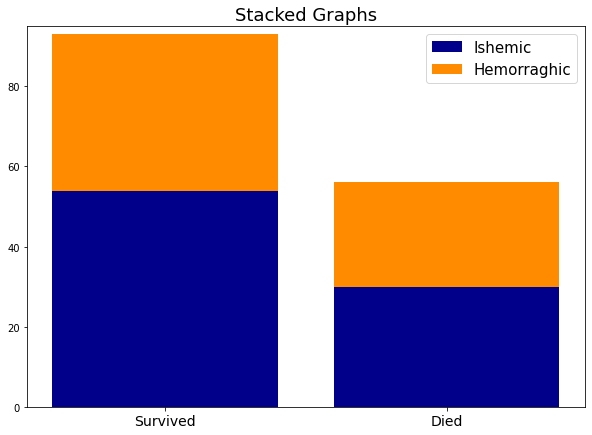

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ind = np.arange(2)
ishemic_stats = df[df['Stroke Diagnosis'] == 1]['Death'].value_counts().values
hemorraghic_stats = df[df['Stroke Diagnosis'] == 0]['Death'].value_counts().values
ax.set_title('Stacked Graphs', fontsize = 18)  
ax.bar(ind, ishemic_stats, label = 'Ishemic', color = 'darkblue')
ax.bar(ind, hemorraghic_stats, label = 'Hemorraghic', 
             color = 'darkorange',bottom=ishemic_stats)
ax.set_xticks(range(0, 2))
ax.set_ylim(0,95)
ax.set_xticklabels(['Survived','Died'], fontsize = 14)
plt.legend(['Ishemic','Hemorraghic'], fontsize = 15);
plt.show()

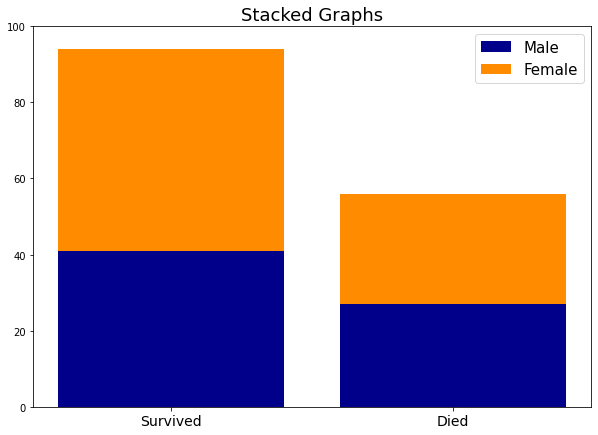

In [78]:
fig, ax = plt.subplots(figsize=(10,7))
ind = np.arange(2)
ishemic_stats = df[df['Gender'] == 1]['Death'].value_counts().values
hemorraghic_stats = df[df['Gender'] == 0]['Death'].value_counts().values
ax.set_title('Stacked Graphs', fontsize = 18)  
ax.bar(ind, ishemic_stats, label = 'Male', color = 'darkblue')
ax.bar(ind, hemorraghic_stats, label = 'Hemorraghic', 
             color = 'darkorange',bottom=ishemic_stats)
ax.set_xticks(range(0, 2))
ax.set_ylim(0,100)
ax.set_xticklabels(['Survived','Died'], fontsize = 14)
plt.legend(['Male','Female'], fontsize = 15);
plt.show()

## Data preprocessing

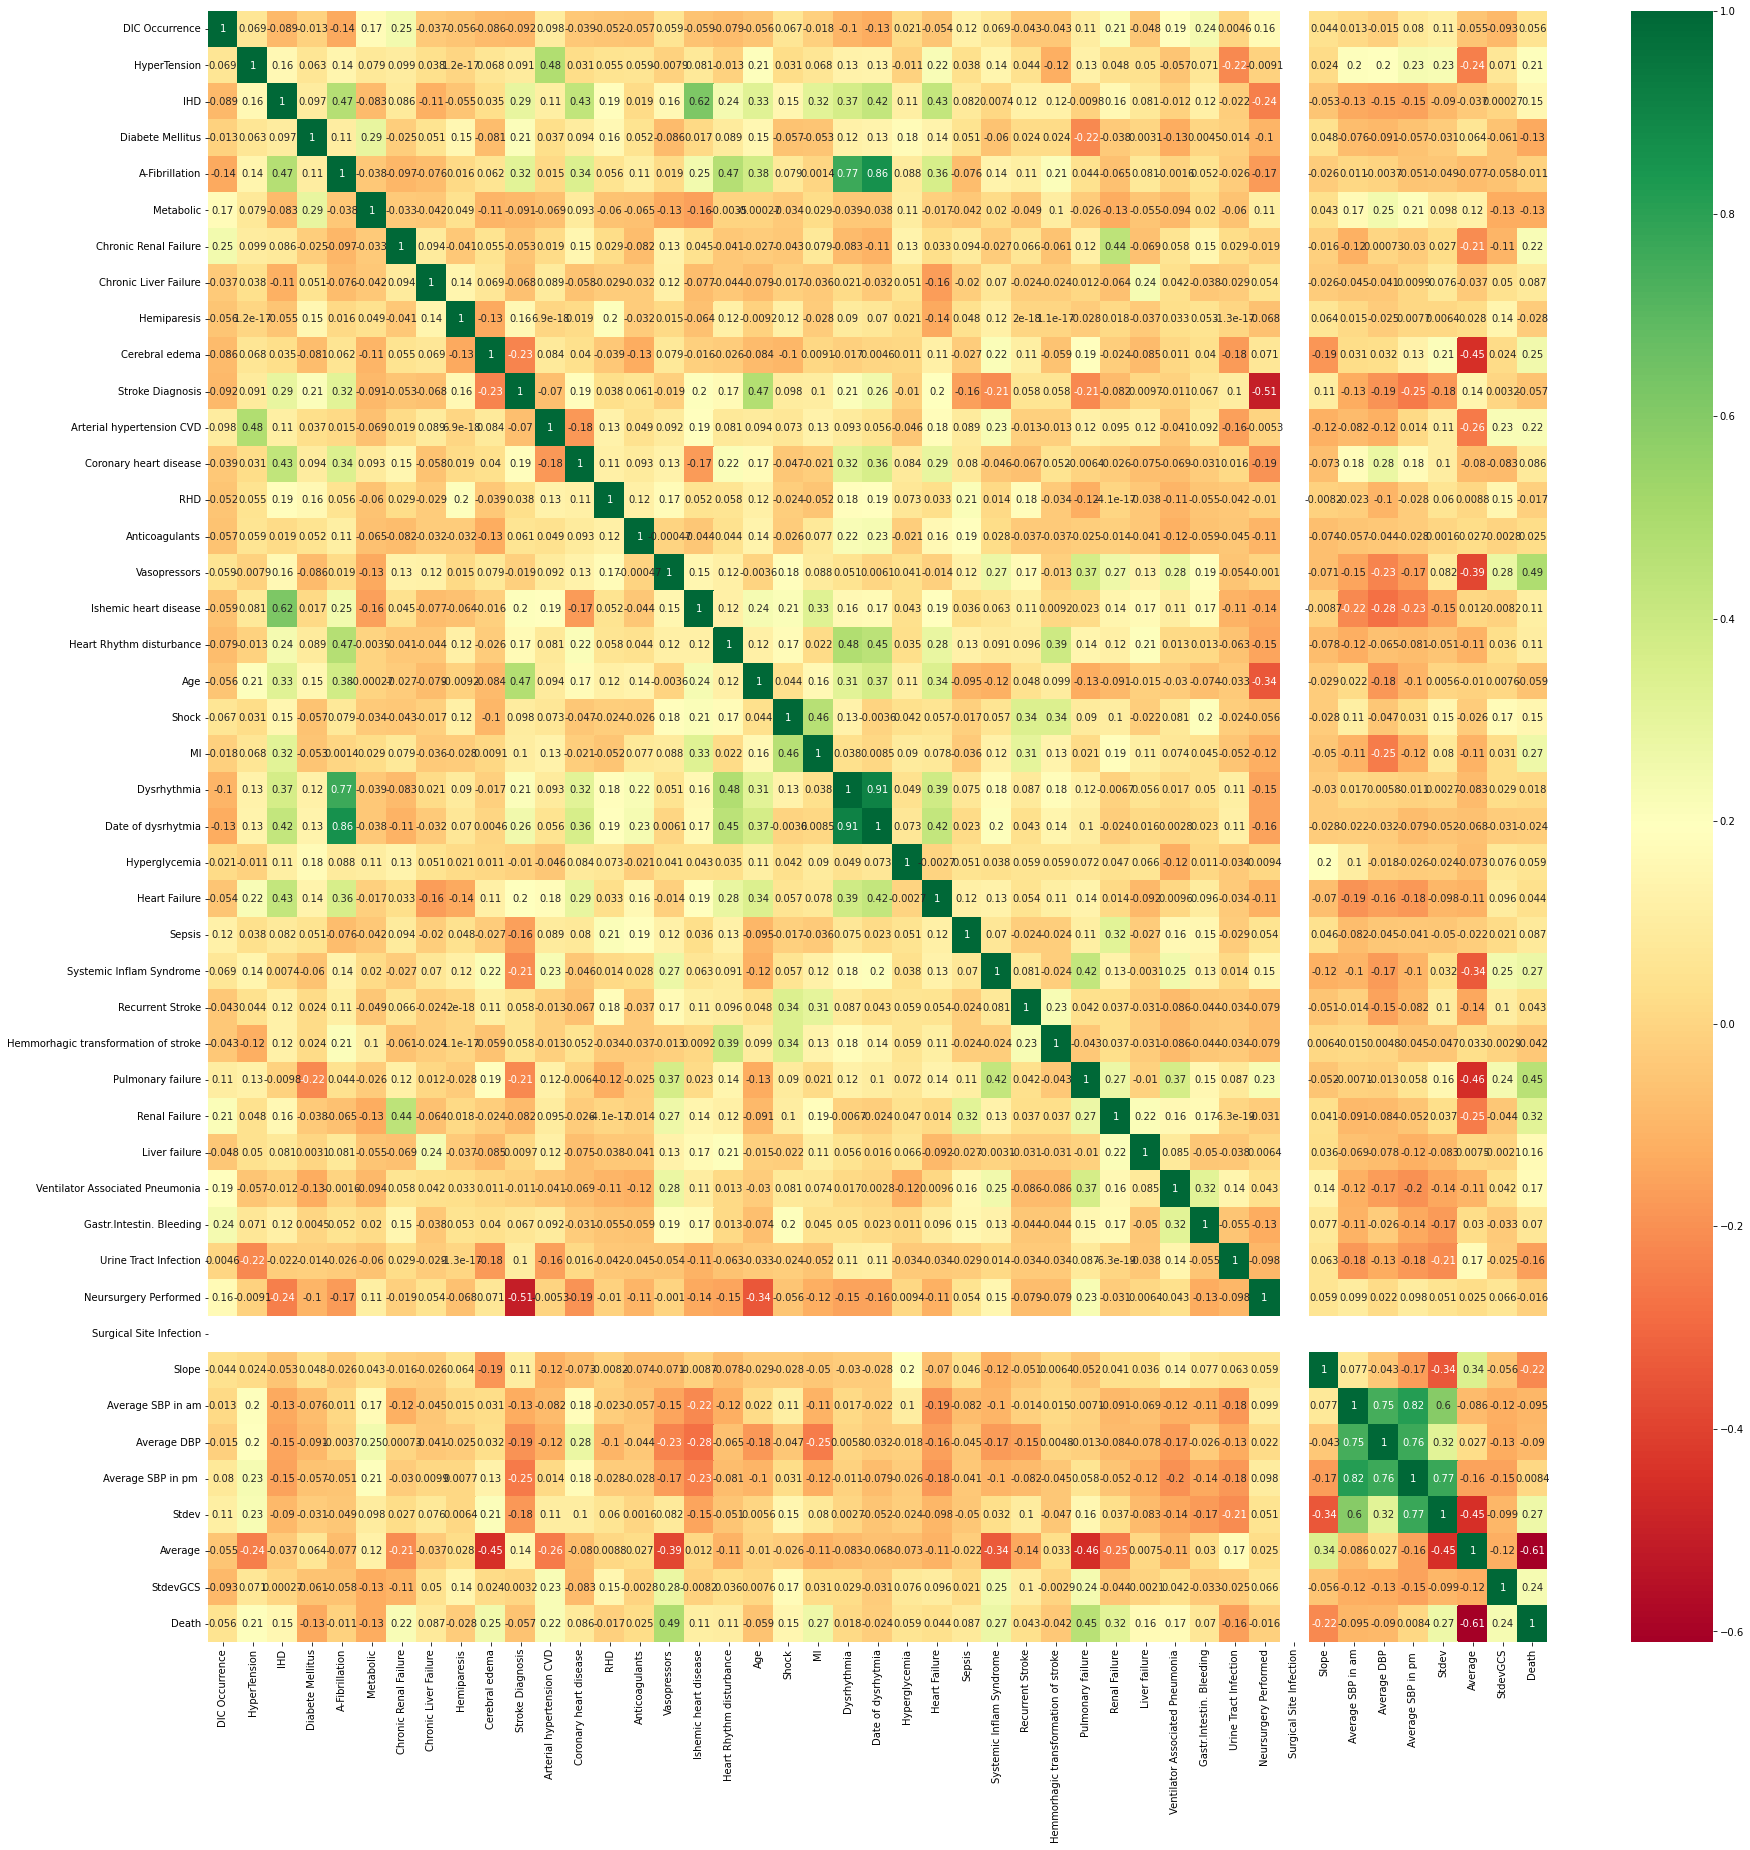

In [145]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [149]:
df = df.drop(['Diabete Mellitus','Slope','Metabolic','Urine Tract Infection','Date of dysrhytmia','Average'],1)

In [87]:
df.shape

(150, 40)

In [150]:
X = df.iloc[:,0:df.shape[1]-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

In [151]:
bestfeatures = SelectKBest(score_func=chi2,k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(df.shape[1]-1,'Score'))

                                   Specs      Score
13                          Vasopressors  25.277727
36                                 Stdev  17.218393
27                         Renal Failure  12.841945
26                     Pulmonary failure  11.505279
18                                    MI  10.224924
4                  Chronic Renal Failure   6.620061
38                              StdevGCS   6.280877
7                         Cerebral edema   5.538671
33                     Average SBP in am   3.934379
28                         Liver failure   3.890578
9              Arterial hypertension CVD   3.669127
29       Ventilator Associated Pneumonia   3.410928
17                                 Shock   3.357143
34                           Average DBP   2.276030
23              Systemic Inflam Syndrome   2.163889
2                                    IHD   2.106711
16                                   Age   1.780427
15              Heart Rhythm disturbance   1.515139
14          

In [152]:
for i in range(len(fit.scores_)):
    if fit.scores_[i] < 0.1:
        df = df.drop([X.columns[i]],1)

In [91]:
df.shape

(150, 32)

In [153]:
X = df.iloc[:,0:df.shape[1]-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

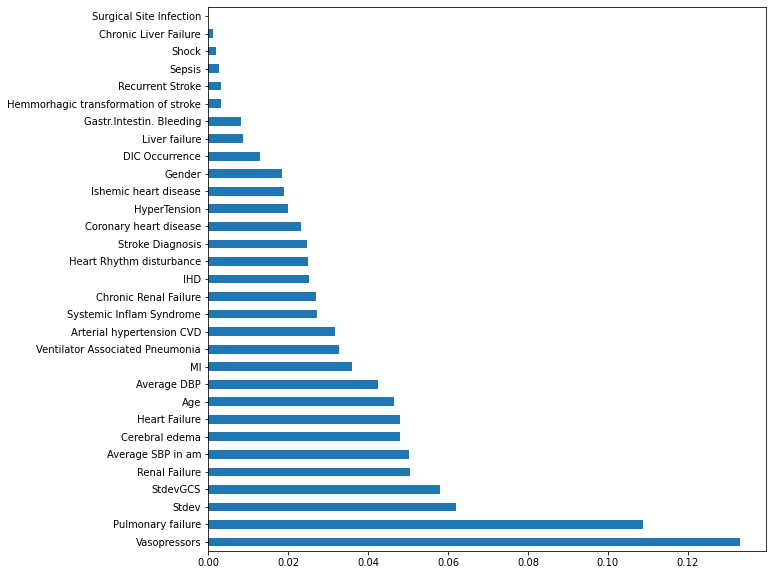

In [154]:
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(10,10))
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(df.shape[1]-1).plot(kind='barh')
plt.show()

In [155]:
df = df.drop(['Sepsis','Shock','Chronic Liver Failure','Surgical Site Infection','Hemmorhagic transformation of stroke','Recurrent Stroke'],1)

In [95]:
df.shape

(150, 26)

In [ ]:
df.to_csv('data.csv')

## Running models

In [173]:
labels = df['Death']
dataset = df.drop(['Death'],1)
data = dataset.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [157]:
def model_assess(model, title):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(title)
    print('Accuracy:', round(accuracy_score(y_test, preds), 5))
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    
    balancedAccuracy = 0.5*(tp/(tp+fn)+tn/(tn+fp))
    print('Balanced Accuracy:',balancedAccuracy)
    f1 = 2*(tp/(tp+fp)*tp/(tp+fn))/(tp/(tp+fp)+tp/(tp+fn))
    print('F1-score:',f1,'\n')
    plot_confusion_matrix(model, X_test, y_test)
    return round(accuracy_score(y_test, preds), 5)

Naive Bayes
Accuracy: 0.7
Balanced Accuracy: 0.7222222222222223
F1-score: 0.6896551724137931 



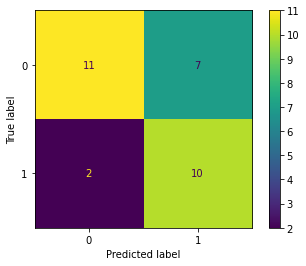

In [191]:
results = []
# Naive Bayes
nb = GaussianNB()
results.append(model_assess(nb, "Naive Bayes"))

Decission trees
Accuracy: 0.73333
Balanced Accuracy: 0.7222222222222222
F1-score: 0.6666666666666666 



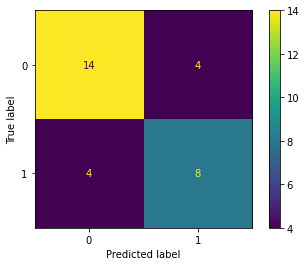

In [192]:
# Decission trees
tree = DecisionTreeClassifier()
results.append(model_assess(tree, "Decission trees"))

Support Vector Machine
Accuracy: 0.6
Balanced Accuracy: 0.5
F1-score: nan 



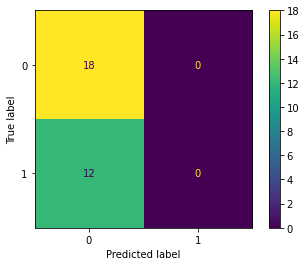

In [194]:
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
results.append(model_assess(svm, "Support Vector Machine"))

[LibLinear]Logistic Regression
Accuracy: 0.66667
Balanced Accuracy: 0.6666666666666666
F1-score: 0.6153846153846153 



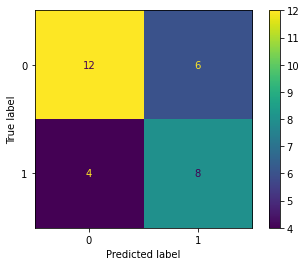

In [198]:
# Logistic Regression0
lg = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr',max_iter=10000,verbose=10,penalty='l1')
results.append(model_assess(lg, "Logistic Regression"))

In [ ]:
check = check.drop(['Death'],1)
#without feature selection
data = check.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [ ]:
results = []
# Naive Bayes
nb = GaussianNB()
results.append(model_assess(nb, "Naive Bayes"))

In [ ]:
# Decission trees
tree = DecisionTreeClassifier()
results.append(model_assess(tree, "Decission trees"))

In [ ]:
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
results.append(model_assess(svm, "Support Vector Machine"))

In [ ]:
# Logistic Regression0
lg = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr',max_iter=10000,verbose=10,penalty='l1')
results.append(model_assess(lg, "Logistic Regression"))